# Tilkallinger basert på forskjellige perioder


In [2]:
# Vi henter alle dataene på nytt for å holde orden i koden 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_excel('Datasett_vaktutkallingar.xlsx')

In [3]:
# Ser på de første 5 radene for å sikre at dataen er med slik som de er
df.head(n=5)

,AOnr,Objektnr,Objektnavn,Jobbomr.,Jobbtype,Status,AO tekst,K,Pr.,Pl. ferdig,Utførande,Est.,Fakt,Fag,Ferdig
0,730823,KJ-442,Truck Diesel Toyota 40-8FD60,Vedlikehald,Korrigerande,Ferdigmeldt,Høy temperatur ---> fyllt kjølebveske,NaN,U,2021-09-01,vakt_kj,2.0,1.0,NaN,2021-09-01
1,730824,EP-217-007,Fyllesjakt for kaldt bad (RR-anl),Vedlikehald,Korrigerande,Ferdigmeldt,Klump i sjakt tygger ikke unna ---> Sjå 5xWhy,3.0,U,2021-09-01,vakt_mekanisk,2.0,2.0,Mekanisk,2021-09-02
2,730825,KJ-565,"Tappekjøretøy, Hydeq MTV 07",Vedlikehald,Korrigerande,Ferdigmeldt,Defekt ac anlegg ---> Kobling på oljekompresso...,2.0,U,2021-09-01,vakt_kj,2.0,2.0,NaN,2021-09-01
3,730827,SP-860-000,"Støpemaskin A felles, div.",Vedlikehald,Korrigerande,Ferdigmeldt,Der er to bolter som er stivna i brodet under ...,1.0,U,2021-09-01,vakt_mekanisk,2.0,2.0,Mekanisk,2021-09-02
4,730828,KJ-207,Anodeveksler SMV,Vedlikehald,Korrigerande,Ferdigmeldt,"Sleit slange i klokke, tok fyr i klokke så må ...",3.0,U,2021-09-01,vakt_kj,2.0,2.0,Mekanisk,2021-09-02


In [4]:
# Ser på de siste 5 radene for å sikre at dataen er med slik som de er
df.tail(n=5)

,AOnr,Objektnr,Objektnavn,Jobbomr.,Jobbtype,Status,AO tekst,K,Pr.,Pl. ferdig,Utførande,Est.,Fakt,Fag,Ferdig
4105,793113,SP-876-220,Kompressor 1. øst,Vedlikehald,Korrigerande,Ferdigmeldt,Sikring utløyst på kompressor,3.0,U,2023-08-30,vakt_elektro,2.0,2.5,Elektro,2023-08-31
4106,791625,KJ-205,Anodeveksler SMV,Vedlikehald,Korrigerande,Ferdigmeldt,Olje lekkasje på tobbe sylinder ---> Bytte syl...,3.0,U,2023-08-31,vakt_kj,2.0,2.5,NaN,2023-08-13
4107,793158,SP-440-006,Sponpresse nr.5. sag 5.,Vedlikehald,Korrigerande,Ferdigmeldt,kraftig olje lekkasje på sponpresse sag 5,3.0,U,2023-08-31,vakt_mekanisk,2.0,2.0,Mekanisk,2023-08-31
4108,793221,BY-209,Silo A,Vedlikehald,Korrigerande,Ferdigmeldt,Det er registrert lekasje på silotopp må kontr...,4.0,U,2023-08-31,vakt_mekanisk,5.0,5.0,Mekanisk,2023-08-31
4109,793227,AK-411-020,Robot arm m/griper,Vedlikehald,Korrigerande,Ferdigmeldt,Knekka tilt sylinder + føring på GF i SP5 --->...,2.0,U,2023-08-31,vakt_mekanisk,3.0,3.0,Mekanisk,2023-09-01


In [5]:
df['Pl. ferdig'] = pd.to_datetime(df['Pl. ferdig'])  # Konverter "Pl. ferdig"-kolonnen til en datetime
monthly_calls = df.groupby(df['Pl. ferdig'].dt.to_period("M")).size() # Grupper dataene per måned og tell antall vakttilkallinger

## Visualisere antall tilkallinger for hver mnd 

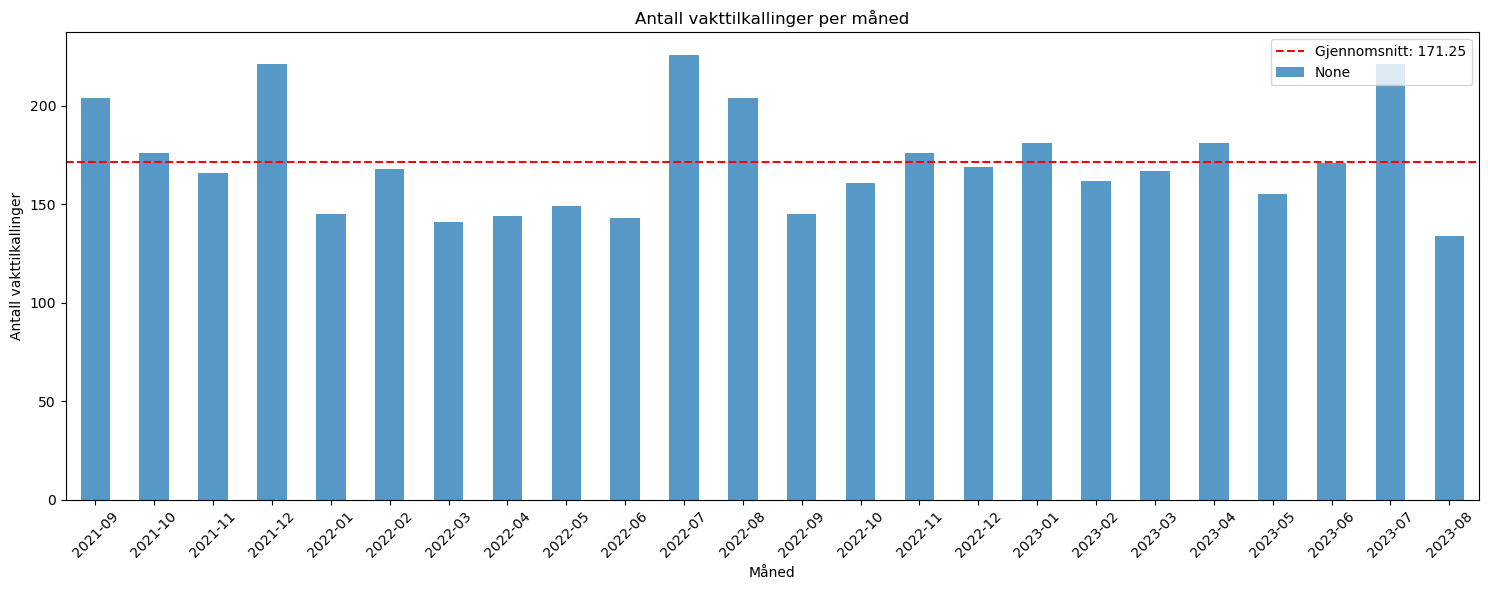

In [6]:
average_calls = monthly_calls.mean()

plt.figure(figsize=(15, 6))
monthly_calls.plot(kind='bar', alpha=0.75)  # Reduserer opaciteten litt for å se gjennomsnittslinjen tydeligere
plt.axhline(y=average_calls, color='r', linestyle='--', label=f'Gjennomsnitt: {average_calls:.2f}')
plt.title("Antall vakttilkallinger per måned")
plt.xlabel("Måned")
plt.ylabel("Antall vakttilkallinger")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Hvilket jobområdet tilhører alle dataene tilkallingene? 



Jobbomr.
Drift           145
Vedlikehald    3965
Name: Count, dtype: int64


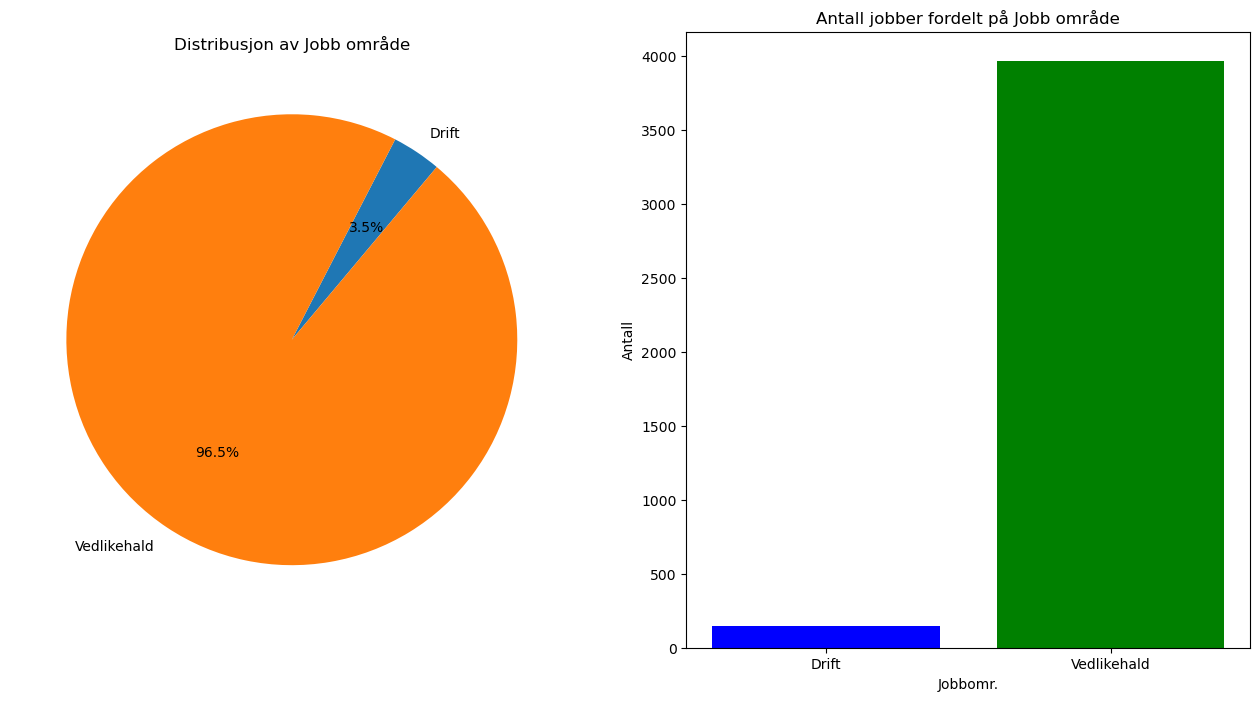

In [24]:
#gruppere etter Jobbområde
grouped_df = df.groupby('Jobbomr.').size()
grouped_df.name ="Count"

print((grouped_df))

dataFrameJobbOm = grouped_df.reset_index()
dataFrameJobbOm

plt.figure(figsize=(16, 8))

# Create a bar plot
plt.subplot(1, 2, 2)
# plt.figure(figsize=(10, 6))
plt.bar(dataFrameJobbOm['Jobbomr.'], dataFrameJobbOm['Count'], color=['blue', 'green'])
plt.xlabel('Jobbomr.')
plt.ylabel('Antall')
plt.title('Antall jobber fordelt på Jobb område')
# plt.show()

# Create a pie chart
plt.subplot(1, 2, 1)
# plt.figure(figsize=(8, 8))
plt.pie(dataFrameJobbOm['Count'], labels=dataFrameJobbOm['Jobbomr.'], autopct='%1.1f%%', startangle=50,)
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribusjon av Jobb område')
plt.show()


# Analysere "Verstingene" 
Nå skal vi analysere hvert objekt alene og finne ut mere informasjon i datasettet. 

### Vi finner først ut hvor mange objekter vi har.  

In [8]:
# Finne ut alle kolonne navnene og srive ut  

column_name = list(df.columns)
print(column_name)

# antal unike objekter

unique_objekts = df['Objektnr'].unique()
unique_objekts_len = len(list(unique_objekts))

print("Antall unike objekter: ", unique_objekts_len) # vi har totalt 884 forskjellige objekter
# print("Unike ojekter navn:\n", unique_objekts) # Du kan skrive ut alle navnene her 


['AOnr', 'Objektnr', 'Objektnavn', 'Jobbomr.', 'Jobbtype', 'Status', 'AO tekst', 'K', 'Pr.', 'Pl. ferdig', 'Utførande', 'Est.', 'Fakt', 'Fag', 'Ferdig']
Antall unike objekter:  884


# Filtrering og forberedelser av data

Vårt data sett er for 3 års periode. og vi kan se i datasettet vårt at det er mange objekter som kun har hatt en vakttilkalling. Noen viktige punkter:

- Vi må bestemme oss for objekter objekter vi skal analysere
- Hvordan skal vi velge hvem vi skal analysere? 


In [9]:
# Først grupperer vi objektene etter antall tilkallinger
grouped_df = df.groupby('Objektnr').size()
grouped_df.name = "Antall"

# Konvertere dataserie til data frame
grouped_df = grouped_df.reset_index()

# VI finner den verste og begynner med den 

# Printe ut antall objekter med antall tilkallinger 
print("Objektnr med antall tilkallinger: ")
print(grouped_df)

# vi sortere etter de med størst antall 
sorted_df = grouped_df.sort_values(by='Antall', ascending=False)

print("Objektnr med antall tilkallinger sortert [største -> minst]: ")
print(sorted_df)

# printer de 20 "verste"
sorted_df.head(n=20)



Objektnr med antall tilkallinger: 
       Objektnr  Antall
0    AK-102-001       1
1    AK-102-002       1
2    AK-102-007       8
3    AK-102-008       2
4    AK-102-009       4
..          ...     ...
879  VF-721-030       4
880  VF-721-040       4
881  VF-721-050       4
882  VF-818-211      11
883  VF-818-212       7

[884 rows x 2 columns]
Objektnr med antall tilkallinger sortert [største -> minst]: 
       Objektnr  Antall
416      KJ-208      85
421      KJ-209      83
409      KJ-207      70
397      KJ-205      55
676  SP-440-006      53
..          ...     ...
517  KJ-552-011       1
516  KJ-552-007       1
145  BY-210-219       1
226  EP-117-022       1
0    AK-102-001       1

[884 rows x 2 columns]


,Objektnr,Antall
416,KJ-208,85
421,KJ-209,83
409,KJ-207,70
397,KJ-205,55
676,SP-440-006,53
560,KJ-572,51
543,KJ-565,44
442,KJ-217,43
623,SP-418-100,40
522,KJ-561,39


### Vi begynner å analysere de 20 objektene som har hatt mest vakttilkallinger gjennom alle tre årene



### Andel av totalen 

Vi kan først se hvor mye de "20 verstingene" utgjør i forhold til resten a datasettet. Vi kan visualisere ved hjelp av kakediagram. 


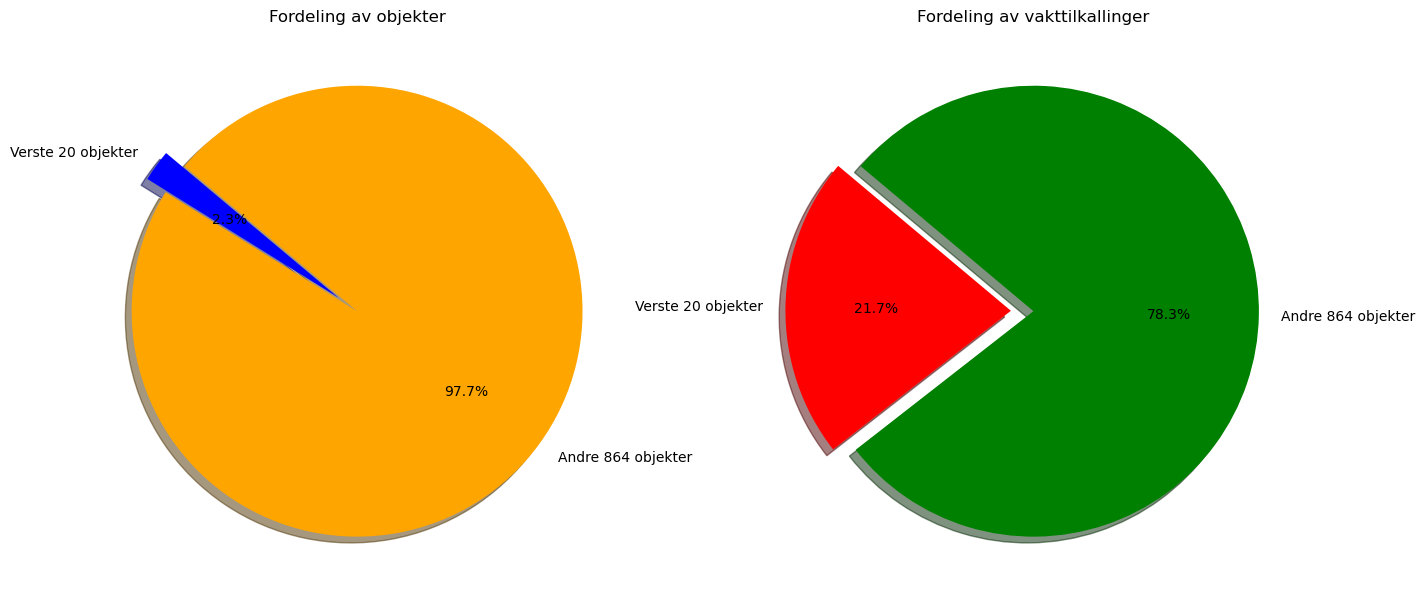

,AOnr,Objektnr,Objektnavn,Jobbomr.,Jobbtype,Status,AO tekst,K,Pr.,Pl. ferdig,Utførande,Est.,Fakt,Fag,Ferdig
2,730825,KJ-565,"Tappekjøretøy, Hydeq MTV 07",Vedlikehald,Korrigerande,Ferdigmeldt,Defekt ac anlegg ---> Kobling på oljekompresso...,2.0,U,2021-09-01,vakt_kj,2.0,2.0,NaN,2021-09-01
4,730828,KJ-207,Anodeveksler SMV,Vedlikehald,Korrigerande,Ferdigmeldt,"Sleit slange i klokke, tok fyr i klokke så må ...",3.0,U,2021-09-01,vakt_kj,2.0,2.0,Mekanisk,2021-09-02
5,730830,SP-418-100,Bandemaskin,Vedlikehald,Korrigerande,Ferdigmeldt,Problem med bandemaskin ---> Sjå 5xWhy,NaN,U,2021-09-01,vakt_mekanisk,3.0,9.5,Mekanisk,2021-09-02
8,730923,KJ-205,Anodeveksler SMV,Vedlikehald,Korrigerande,Ferdigmeldt,Starter ikke står ved A 36 ---> Tom for diesel...,3.0,U,2021-09-02,vakt_kj,2.0,2.0,NaN,2021-09-02
13,730929,KJ-205,Anodeveksler SMV,Vedlikehald,Korrigerande,Ferdigmeldt,fremdrift virker ikkje sto ved a30 ---> Slept ...,3.0,U,2021-09-02,vakt_kj,2.0,2.0,NaN,2021-09-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4096,792781,KJ-217,Badrenskemaskin Hydeq,Vedlikehald,Korrigerande,Ferdigmeldt,Starter ikkje. Prøvd med kabler uten hell. Stå...,3.0,U,2023-08-27,vakt_kj,2.0,1.5,Kjøretøy,2023-08-27
4098,792784,KJ-218,Badrenskemaskin Hydeq,Vedlikehald,Korrigerande,Ferdigmeldt,Oljelekkasje i slange til grabbhodet ---> Bytt...,3.0,U,2023-08-27,vakt_kj,2.0,1.0,Kjøretøy,2023-08-27
4100,792802,KJ-572,Badtappekjøretøy (nytt),Vedlikehald,Korrigerande,Ferdigmeldt,Får ikkje opp røyr/får ikkje tømma.Full digle ...,1.0,U,2023-08-27,vakt_kj,2.0,1.5,NaN,2023-08-28
4106,791625,KJ-205,Anodeveksler SMV,Vedlikehald,Korrigerande,Ferdigmeldt,Olje lekkasje på tobbe sylinder ---> Bytte syl...,3.0,U,2023-08-31,vakt_kj,2.0,2.5,NaN,2023-08-13


In [10]:
# de verste 20 
worst_20 = sorted_df.head(n=20)

# resetter indeksene 
worst_20.reset_index(drop=True, inplace=True)

antall_tilkallinger = df['Objektnr'].count()
antall_tilkallinger_worst_20 = sum(worst_20['Antall'])
antall_tilkallinger_others = antall_tilkallinger - antall_tilkallinger_worst_20

# Data for det andre kakediagrammet
total_unike_objekter = df['Objektnr'].nunique()

worst_20_objekter = 20
andre_objekter = total_unike_objekter - worst_20_objekter

labels2 = ['Verste 20 objekter', f'Andre {andre_objekter} objekter']
sizes2 = [worst_20_objekter, andre_objekter]
colors2 = ['blue', 'orange']
explode2 = (0.1, 0)

# Data for det første kakediagrammet
labels1 = ['Verste 20 objekter', f'Andre {andre_objekter} objekter']
sizes1 = [antall_tilkallinger_worst_20, antall_tilkallinger_others]
colors1 = ['red', 'green']
explode1 = (0.1, 0)

# Lage kakediagrammene
plt.figure(figsize=(16, 8))

# Første kakediagram
plt.subplot(1, 2, 2)
plt.pie(sizes1, explode=explode1, labels=labels1, colors=colors1, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Fordeling av vakttilkallinger")

# Andre kakediagram
plt.subplot(1, 2, 1)
plt.pie(sizes2, explode=explode2, labels=labels2, colors=colors2, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Fordeling av objekter")

plt.show()

# Alle objektnr
worst_20_objektnr = worst_20['Objektnr']


filtered_df = df[df['Objektnr'].isin(worst_20_objektnr)]

filtered_df

### Visualisere antall tilkallinger for hver mnd 

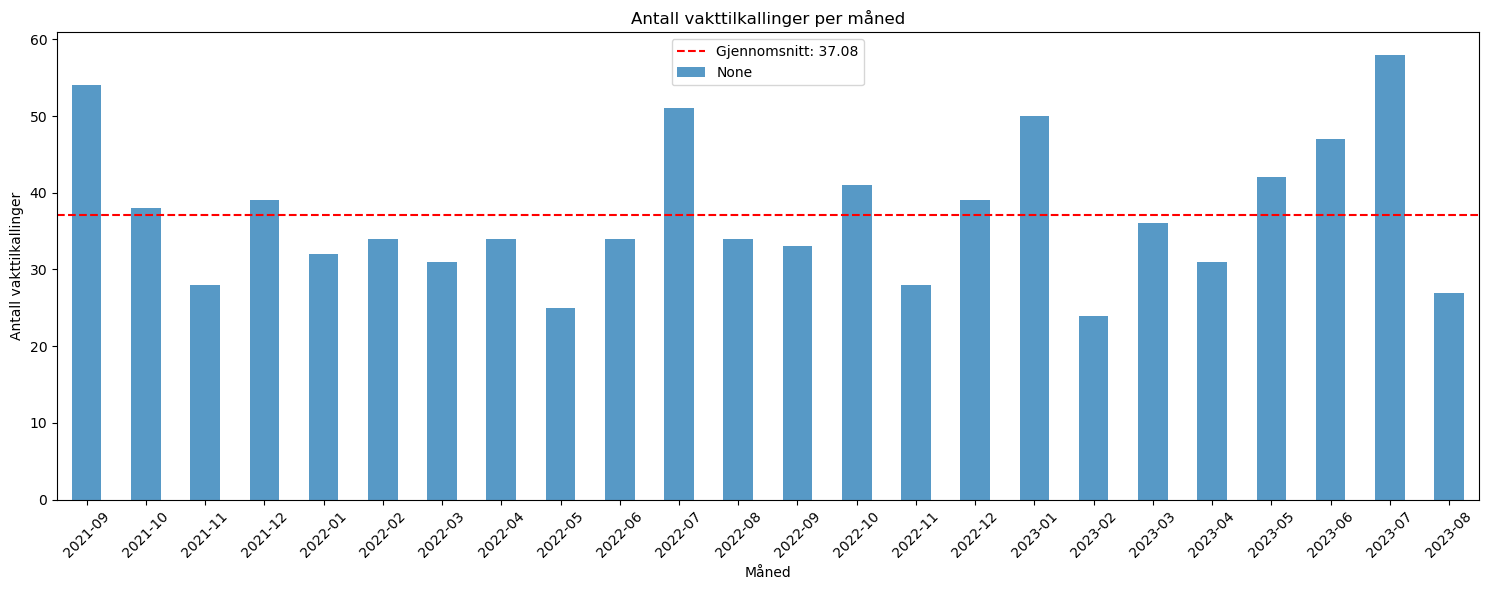

In [11]:

start_date = filtered_df['Pl. ferdig'].min().to_period('M')
end_date = filtered_df['Pl. ferdig'].max().to_period('M')
all_months = pd.period_range(start_date, end_date, freq='M')

monthly_calls_worst_20 = filtered_df.groupby(filtered_df['Pl. ferdig'].dt.to_period("M")).size()

monthly_calls_worst_20 = monthly_calls_worst_20.reindex(all_months, fill_value=0)


average_calls_worst_20 = monthly_calls_worst_20.mean()

plt.figure(figsize=(15, 6))
monthly_calls_worst_20.plot(kind='bar', alpha=0.75)  # Reduserer opaciteten litt for å se gjennomsnittslinjen tydeligere
plt.axhline(y=average_calls_worst_20, color='r', linestyle='--', label=f'Gjennomsnitt: {average_calls_worst_20:.2f}')
plt.title("Antall vakttilkallinger per måned")
plt.xlabel("Måned")
plt.ylabel("Antall vakttilkallinger")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### Visualisere hvert objekt's vakttilkallinger for alle tre årene for hver mnd 

C:\Users\shahinos\AppData\Local\Temp\ipykernel_31464\2619999433.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(monthly_calls.index.astype(str), rotation=45)
C:\Users\shahinos\AppData\Local\Temp\ipykernel_31464\2619999433.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(monthly_calls.index.astype(str), rotation=45)
C:\Users\shahinos\AppData\Local\Temp\ipykernel_31464\2619999433.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(monthly_calls.index.astype(str), rotation=45)
C:\Users\shahinos\AppData\Local\Temp\ipykernel_31464\2619999433.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(monthly_calls.index.astype(str), rotation=45)
C:\Users\shahinos\AppData\Local\Temp\ipykernel_31464\2619999433.py:38: UserWarning: FixedFormatter should only be used together with

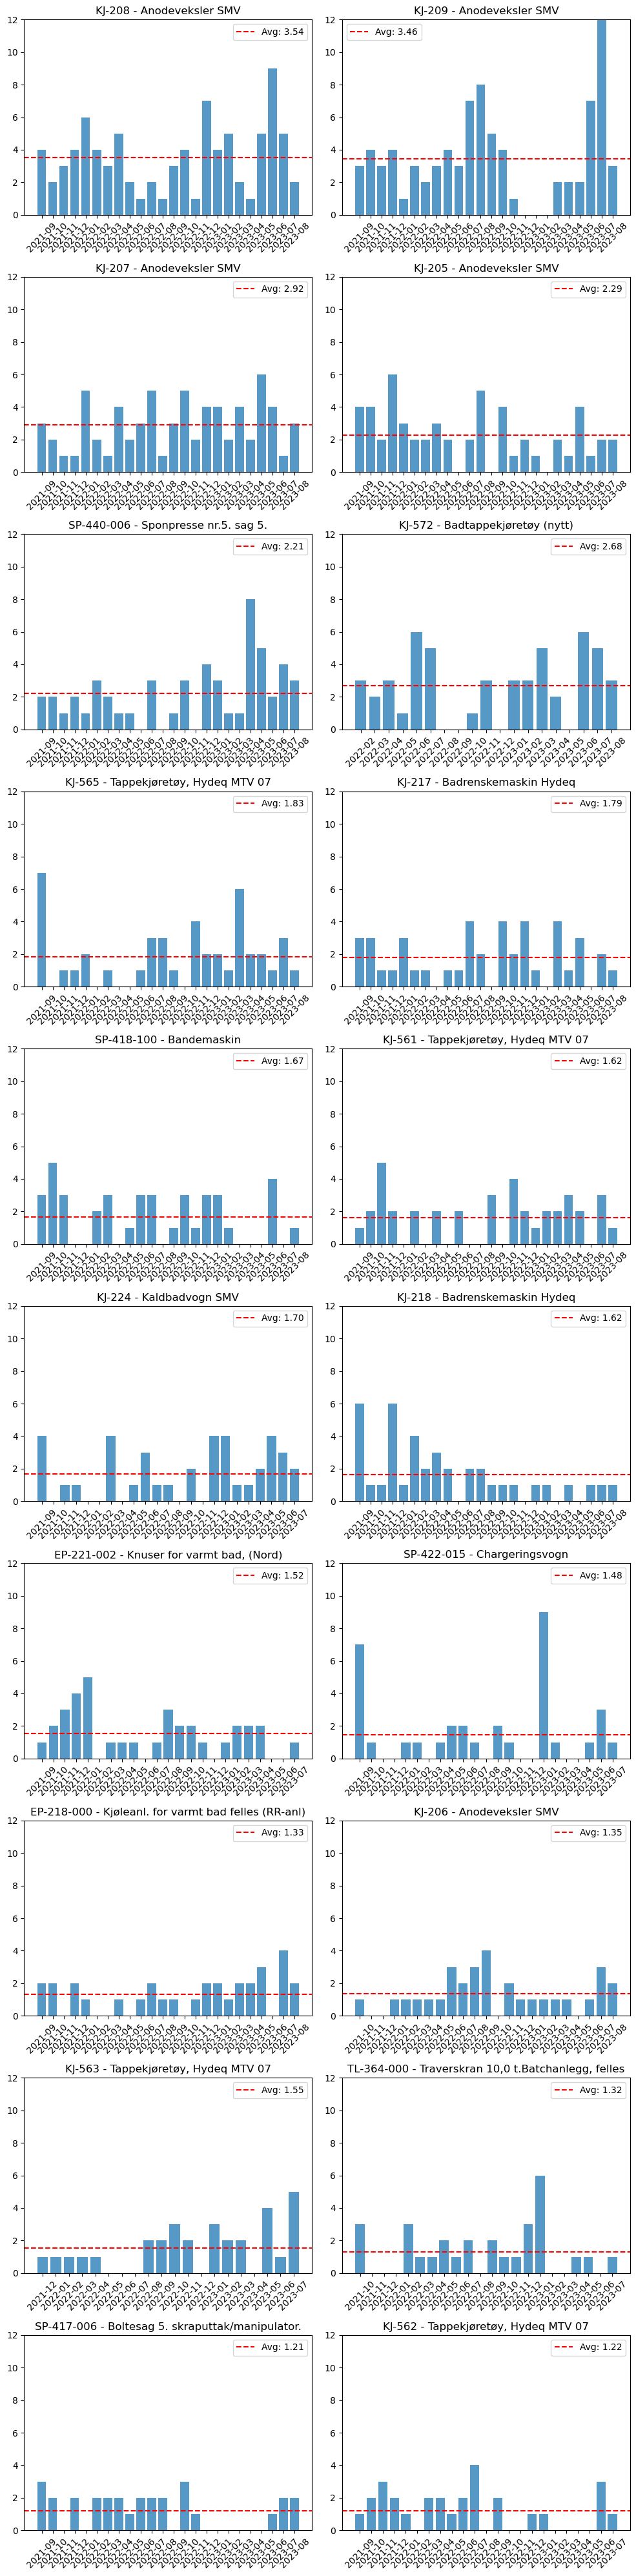

In [16]:
fig, axs = plt.subplots(10, 2, figsize=(10,40))

# Flatten the array of axis subplots, so we can easily loop over it
axs = axs.flatten()

# Initialize variable to keep track of the maximum y-value across all plots
max_y_value = 0

# Create a mapping from Objektnr to Objektnavn
objektnr_to_name = dict(zip(filtered_df['Objektnr'], filtered_df['Objektnavn']))

# First pass to find the maximum y-value
for objektnr in worst_20['Objektnr']:
    temp_df = filtered_df[filtered_df['Objektnr'] == objektnr]
    monthly_calls = temp_df.groupby(temp_df['Pl. ferdig'].dt.to_period("M")).size()
    max_y_value = max(max_y_value, monthly_calls.max())

# Second pass to plot the data
for i, objektnr in enumerate(worst_20['Objektnr']):
    temp_df = filtered_df[filtered_df['Objektnr'] == objektnr]
    monthly_calls = temp_df.groupby(temp_df['Pl. ferdig'].dt.to_period("M")).size()
    
    # Create a complete index that includes all months from the earliest to the latest date
    start_date = temp_df['Pl. ferdig'].min().to_period('M')
    end_date = temp_df['Pl. ferdig'].max().to_period('M')
    all_months = pd.period_range(start_date, end_date, freq='M')
    
    # Reindex your series
    monthly_calls = monthly_calls.reindex(all_months, fill_value=0)
    
    average_calls = monthly_calls.mean()

    objectName = objektnr_to_name.get(objektnr, "Unknown")
    
    axs[i].bar(monthly_calls.index.astype(str), monthly_calls.values, alpha=0.75)
    axs[i].axhline(y=average_calls, color='r', linestyle='--', label=f'Avg: {average_calls:.2f}')
    axs[i].set_title(f"{objektnr} - {objectName}")
    axs[i].set_xticklabels(monthly_calls.index.astype(str), rotation=45)
    axs[i].set_ylim([0, max_y_value])
    axs[i].legend()

# Remove any unused subplots
for i in range(len(worst_20['Objektnr']), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


C:\Users\shahinos\AppData\Local\Temp\ipykernel_31464\2726431358.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(monthly_calls.index.astype(str), rotation=45)
C:\Users\shahinos\AppData\Local\Temp\ipykernel_31464\2726431358.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(monthly_calls.index.astype(str), rotation=45)
C:\Users\shahinos\AppData\Local\Temp\ipykernel_31464\2726431358.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(monthly_calls.index.astype(str), rotation=45)
C:\Users\shahinos\AppData\Local\Temp\ipykernel_31464\2726431358.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(monthly_calls.index.astype(str), rotation=45)
C:\Users\shahinos\AppData\Local\Temp\ipykernel_31464\2726431358.py:33: UserWarning: FixedFormatter should only be used together with

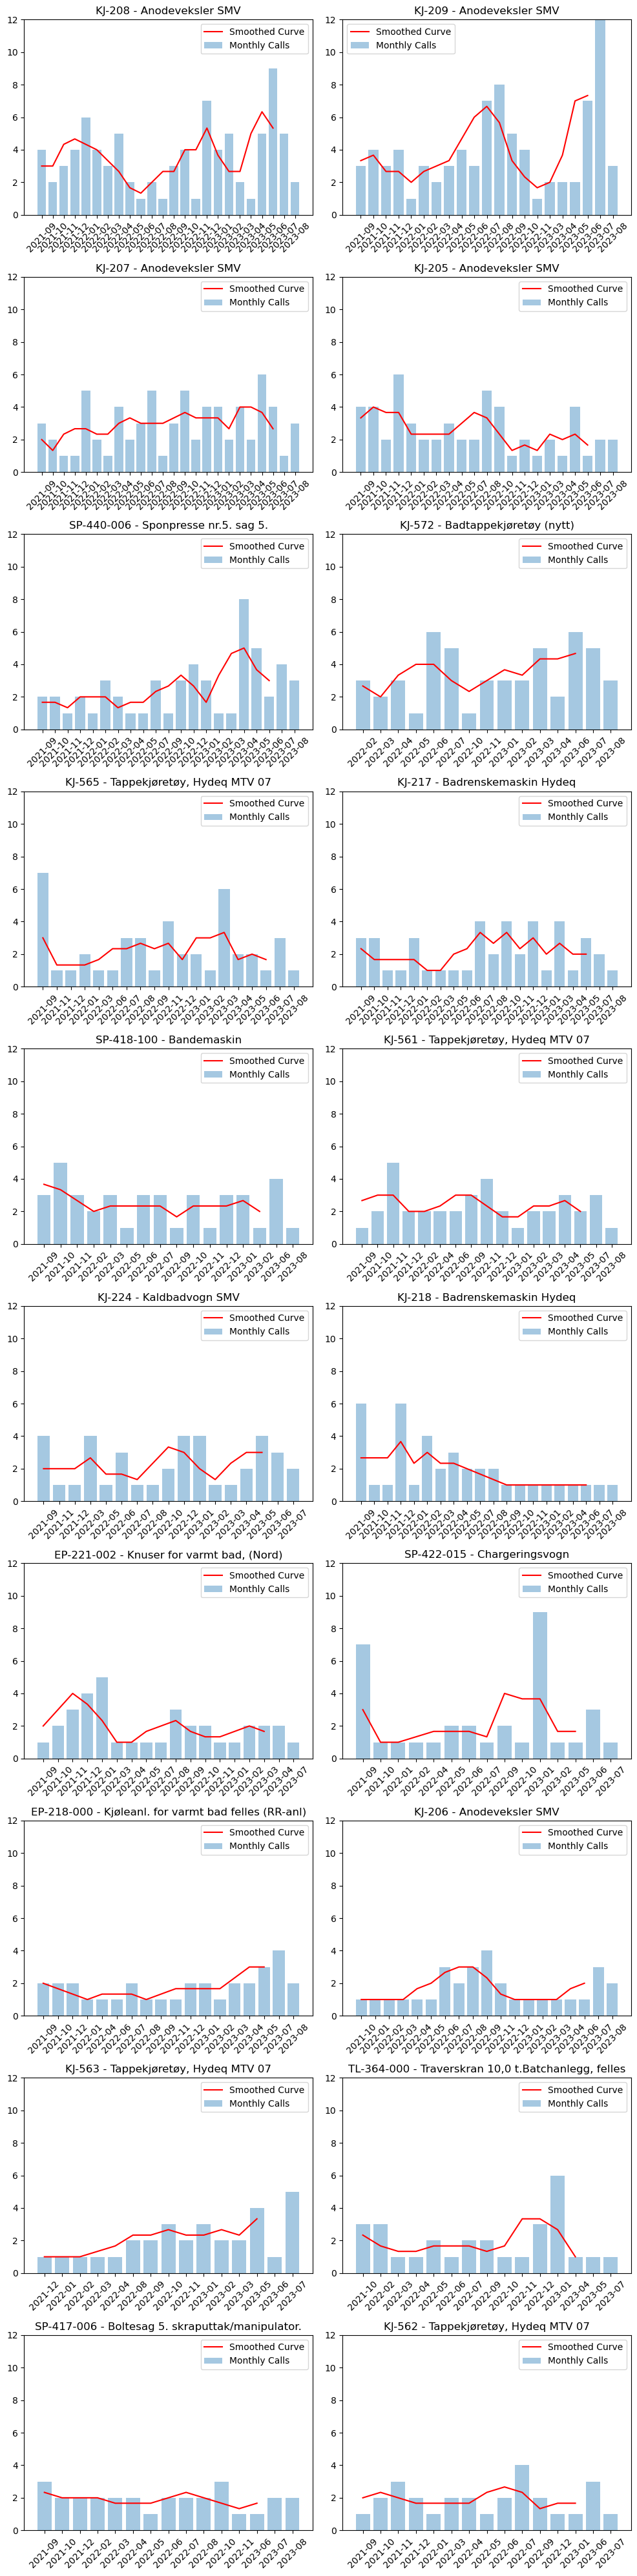

In [17]:
def moving_average(data, window_size):
    """Calculate a simple moving average."""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Create a mapping from Objektnr to Objektnavn
objektnr_to_name = dict(zip(filtered_df['Objektnr'], filtered_df['Objektnavn']))

fig, axs = plt.subplots(10, 2, figsize=(10, 40))
axs = axs.flatten()

max_y_value = 0

# First pass to find the maximum y-value
for objektnr in worst_20['Objektnr']:
    temp_df = filtered_df[filtered_df['Objektnr'] == objektnr]
    monthly_calls = temp_df.groupby(temp_df['Pl. ferdig'].dt.to_period("M")).size()
    max_y_value = max(max_y_value, monthly_calls.max())

# Second pass to plot the data
for i, objektnr in enumerate(worst_20['Objektnr']):
    temp_df = filtered_df[filtered_df['Objektnr'] == objektnr]
    monthly_calls = temp_df.groupby(temp_df['Pl. ferdig'].dt.to_period("M")).size()
    average_calls = monthly_calls.mean()
    
    # Calculate the moving average with a window size of 3
    smoothed_calls = moving_average(monthly_calls, 3)
    
    objectName = objektnr_to_name.get(objektnr, "Unknown")
    
    axs[i].bar(monthly_calls.index.astype(str), monthly_calls.values, alpha=0.4, label='Monthly Calls')
    axs[i].plot(monthly_calls.index.astype(str)[:-2], smoothed_calls, color='r', linestyle='-', label='Smoothed Curve')
    axs[i].set_title(f"{objektnr} - {objectName}")
    axs[i].set_xticklabels(monthly_calls.index.astype(str), rotation=45)
    axs[i].set_ylim([0, max_y_value])
    axs[i].legend()

# Remove any unused subplots
for i in range(len(worst_20['Objektnr']), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()
